<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/CIFAR_with_Tensorflow_KERAS_CNN_and_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()


### Load the Dataset and Prepare testing and training data

In [ ]:
from keras.datasets import cifar10
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

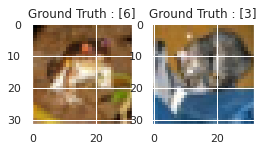

In [ ]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

# Approach -1 - Using simple DNN

In [ ]:
# Load the data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# train set / data 
x_train = x_train.reshape(-1, 32*32*3)
x_train = x_train.astype('float32') / 255



# test set / data 
x_test = x_test.reshape(-1, 32*32*3)
x_test = x_test.astype('float32') / 255

# train set / target 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)

# test set / target 
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

In [ ]:
#Models
model = Sequential()
model.add(Dense(800, input_dim=3072, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),
                    batch_size=200, 
                    epochs=2,  
                    verbose=1)

Epoch 1/2
250/250 [==============================] - 12s 46ms/step - loss: 1.9936 - accuracy: 0.2904 - val_loss: 1.8896 - val_accuracy: 0.3248
Epoch 2/2
250/250 [==============================] - 11s 46ms/step - loss: 1.8391 - accuracy: 0.3593 - val_loss: 1.8035 - val_accuracy: 0.3704


Text(0.5, 1.0, 'Loss Curves')

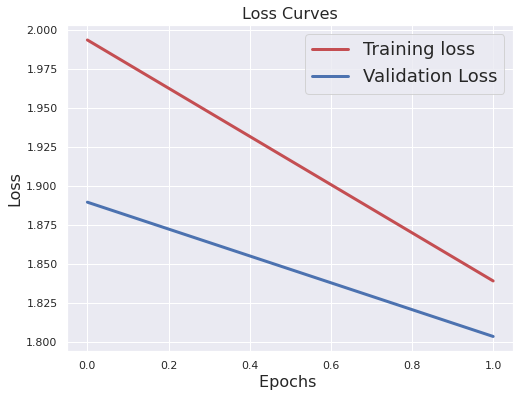

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Approach -2 : Using CNN

## Change the Datatype to Float and Normalize it

In [ ]:
# Load the data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#Normalize
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [ ]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


## Do the one hot Encoding of the Dependent Variable using Keras.utils

In [ ]:
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes= len(np.unique(y_train))

In [ ]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


### Divide the Training Dataset into  validation, Training and Test.

In [ ]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [ ]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [ ]:
print(y_valid.shape)
print(x_valid.shape)


(5000, 10)
(5000, 32, 32, 3)


## Build a CNN Architecture with Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
del model
model= tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)               

In [ ]:
x_train.shape,y_train.shape

((45000, 32, 32, 3), (45000, 10))

In [ ]:
answers=model.fit(x_train,y_train,
                  validation_data=(x_valid,y_valid),
                  shuffle=True,epochs=2,verbose=2,batch_size=200)

Epoch 1/2
225/225 - 24s - loss: 1.6416 - accuracy: 0.3952 - val_loss: 1.5994 - val_accuracy: 0.4042
Epoch 2/2
225/225 - 24s - loss: 1.5534 - accuracy: 0.4319 - val_loss: 1.4935 - val_accuracy: 0.4422


### Stack an ANN on top of CNN

In [ ]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.summary()

### Stack an ANN on top of CNN

model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))

model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))

model.add(tf.keras.layers.Dense(units=10,activation='softmax',kernel_initializer='uniform'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)               

### Fit the model

In [ ]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=2,verbose=2,batch_size=500)

Epoch 1/2
90/90 - 31s - loss: 2.0492 - accuracy: 0.1882 - val_loss: 1.8892 - val_accuracy: 0.2302
Epoch 2/2
90/90 - 31s - loss: 1.8243 - accuracy: 0.2700 - val_loss: 1.7288 - val_accuracy: 0.3192


### Evaluate the Results

In [ ]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.7195 - accuracy: 0.3229


In [ ]:
results

[1.7194870710372925, 0.3228999972343445]

In [ ]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

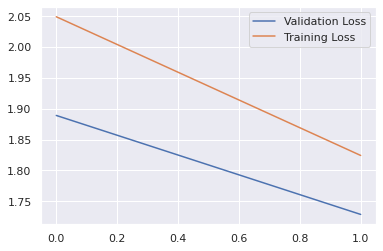

In [ ]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

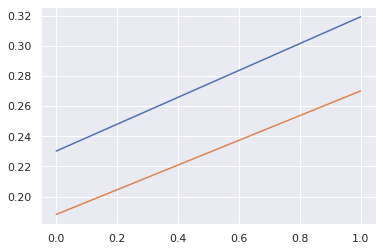

In [ ]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;

# Alternative Approach
https://www.kaggle.com/aayushkubba/cifar-10-analysis-with-a-neural-network